In [2]:
#Import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# **Data Preprocessing**

In [3]:
!ls 'drive/MyDrive/TrueMortem/'

# Read the xlsx file
df = pd.read_excel('drive/MyDrive/TrueMortem/Dataset- 741 Records.xlsx')

df.head()

 Dataset-1100-Records.xlsx		      IHME_PHMRC_VA_DATA_ADULT_Y2013M09D11_0.gsheet
'Dataset- 741 Records.xlsx'		     'Project Documents'
'Dataset- 827 Records.xlsx'		     'Scanned death certificates'
 IHME_PHMRC_VA_DATA_ADULT_Y2013M09D11_0.csv


,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,...,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Blood Vessels-Left anterior descending artery,Blood Vessels-right coronary artery,Blood Vessels-Left circumflex artery,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,Cause of Death
0,M,1.0,1.0,1.0,3.0,276.0,0.0,0.0,1.0,0.0,...,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,2.0,3.0,1.0,3.0,308.0,0.0,0.0,1.0,0.0,...,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,M,1.0,3.0,1.0,3.0,492.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,80.0,80.0,60.0,1.0,0.0,NaN,0.0
3,M,1.0,2.0,1.0,3.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,90.0,40.0,40.0,0.0,0.0,NaN,NaN
4,F,1.0,3.0,1.0,3.0,NaN,1.0,0.0,1.0,0.0,...,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
df.tail()

,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,...,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Blood Vessels-Left anterior descending artery,Blood Vessels-right coronary artery,Blood Vessels-Left circumflex artery,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,Cause of Death
736,F,2.0,3.0,1.0,3.0,382.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,80.0,80.0,60.0,0.0,0.0,2.0,1.0
737,M,1.0,3.0,1.0,3.0,568.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,80.0,60.0,40.0,1.0,0.0,2.0,0.0
738,F,2.0,2.0,1.0,3.0,252.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0
739,M,1.0,1.0,1.0,3.0,300.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0
740,M,1.0,2.0,1.0,3.0,354.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,80.0,90.0,60.0,1.0,0.0,2.0,1.0


In [5]:
# Sanity check of Data
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 24 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Sex                                                                    732 non-null    object 
 1   Nourished                                                              702 non-null    float64
 2   Age- Old                                                               693 non-null    float64
 3   Chest cavity-Free air or adhesions                                     740 non-null    float64
 4   Pericardium-pericardial fluid - in ml                                  626 non-null    float64
 5   Heart-Size                                                             673 non-null    float64
 6   Heart-Size in configuration                                            715 non-null    flo

(741, 24)

In [6]:
# Finding whether there are missing values
df.isnull().sum()   # No Missing values

,0
Sex,9
Nourished,39
Age- Old,48
Chest cavity-Free air or adhesions,1
Pericardium-pericardial fluid - in ml,115
Heart-Size,68
Heart-Size in configuration,26
Heart-Injuries,6
Heart-Normal myocardium,5
Heart-Recent ischaemic changes,5


In [7]:
# Finding Duplicates
df.duplicated().sum()

np.int64(38)

In [8]:
#Investigating these 35 duplicates
df[df.duplicated()]

,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,...,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Blood Vessels-Left anterior descending artery,Blood Vessels-right coronary artery,Blood Vessels-Left circumflex artery,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,Cause of Death
71,F,1.0,2.0,1.0,NaN,NaN,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,90.0,60.0,40.0,1.0,0.0,1.0,1.0
77,M,NaN,NaN,1.0,3.0,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,90.0,80.0,60.0,1.0,0.0,0.0,NaN
104,M,1.0,3.0,1.0,3.0,271.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,90.0,60.0,40.0,0.0,0.0,0.0,1.0
105,F,2.0,3.0,1.0,5.0,362.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,80.0,60.0,40.0,1.0,0.0,0.0,1.0
106,F,2.0,3.0,1.0,6.0,274.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
107,M,1.0,3.0,1.0,3.0,310.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,90.0,80.0,60.0,0.0,0.0,0.0,0.0
108,M,1.0,3.0,1.0,3.0,582.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
109,M,NaN,NaN,1.0,NaN,567.0,NaN,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,F,NaN,1.0,1.0,3.0,183.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111,M,NaN,NaN,1.0,8.0,317.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Identifying garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***" * 10)

Sex
M     489
F     238
M       3
F       2
Name: count, dtype: int64
******************************


In [10]:
df['Sex'].value_counts()

,count
Sex,
M,489
F,238
M,3
F,2


# **Exploratory Data Analysis (EDA)**

### **Descriptive Statistics**

In [11]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nourished,702.0,1.618234,0.677419,1.0,1.0,2.0,2.0,3.0
Age- Old,693.0,2.551227,0.740480,1.0,2.0,3.0,3.0,3.0
Chest cavity-Free air or adhesions,740.0,0.710811,0.453693,0.0,0.0,1.0,1.0,1.0
Pericardium-pericardial fluid - in ml,626.0,9.140575,40.737396,2.0,3.0,3.0,5.0,620.0
Heart-Size,673.0,322.478455,93.410767,24.0,261.0,317.0,375.0,809.0
Heart-Size in configuration,715.0,0.300699,0.458883,0.0,0.0,0.0,1.0,1.0
Heart-Injuries,735.0,0.005442,0.073620,0.0,0.0,0.0,0.0,1.0
Heart-Normal myocardium,736.0,0.732337,0.443042,0.0,0.0,1.0,1.0,1.0
Heart-Recent ischaemic changes,736.0,0.240489,0.427671,0.0,0.0,0.0,0.0,1.0
Heart-Myocardial fibrosis present in,723.0,0.349931,0.557581,0.0,0.0,0.0,1.0,3.0


In [12]:
# Descriptive statistics of object colomns
df.describe(include='object').T

,count,unique,top,freq
Sex,732,4,M,489


### **Visulaizations for the distributions**

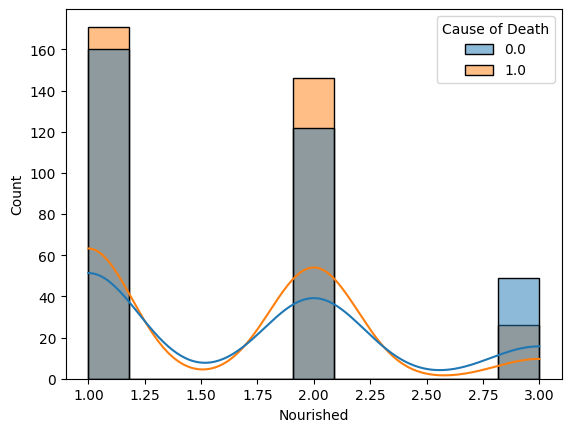

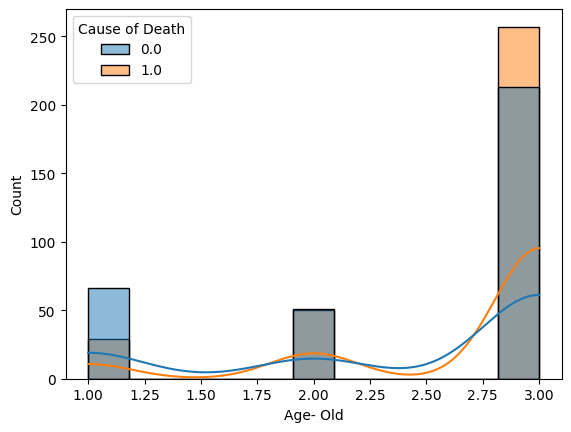

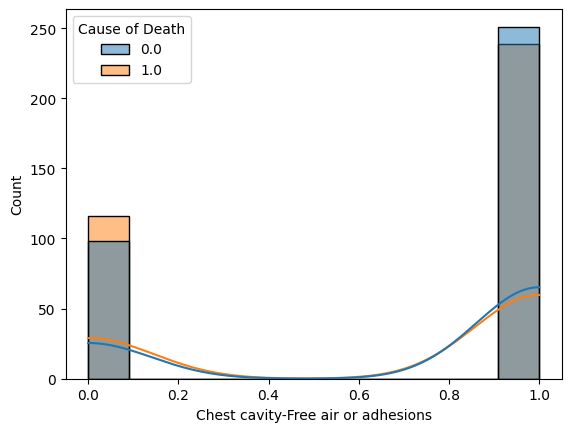

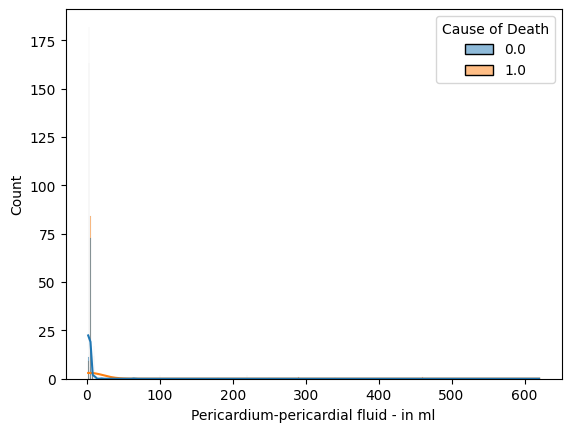

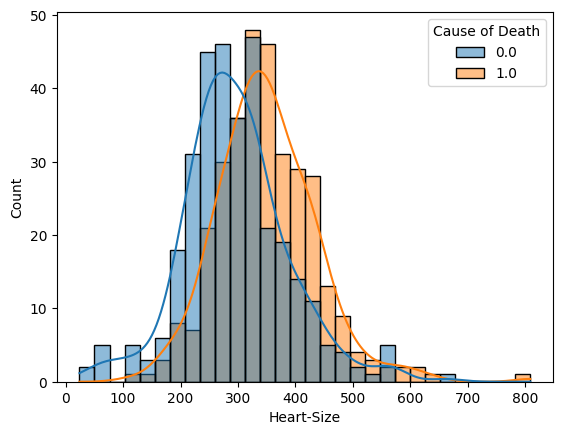

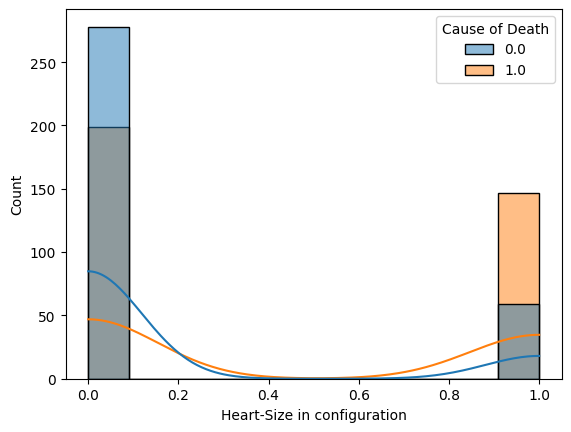

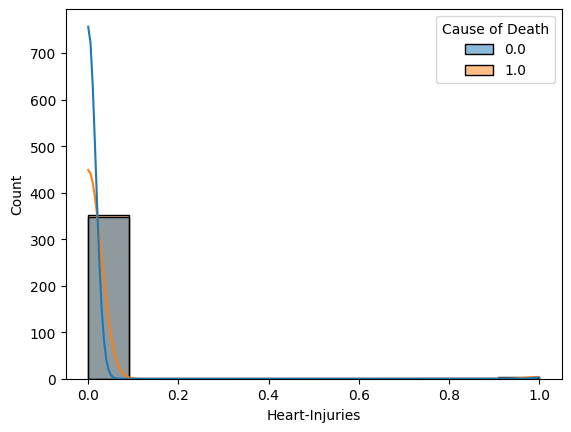

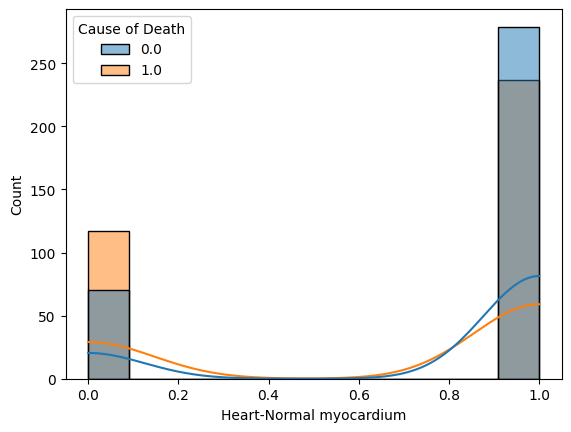

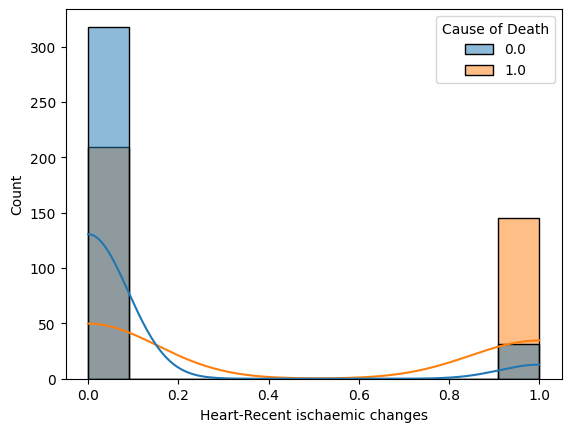

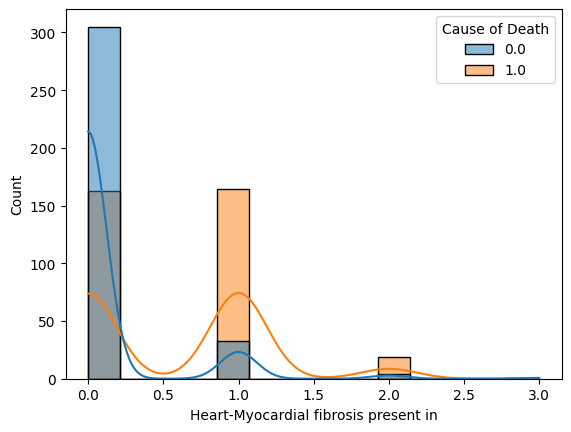

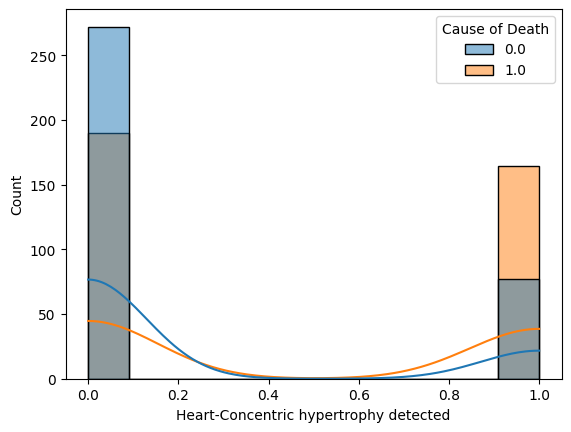

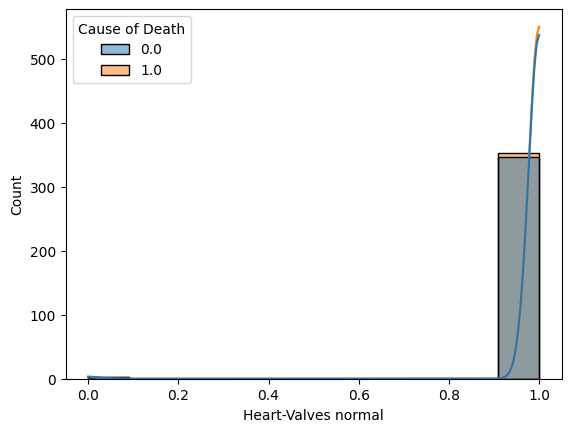

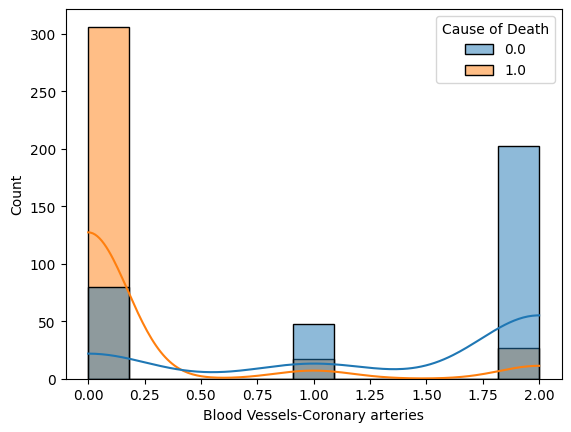

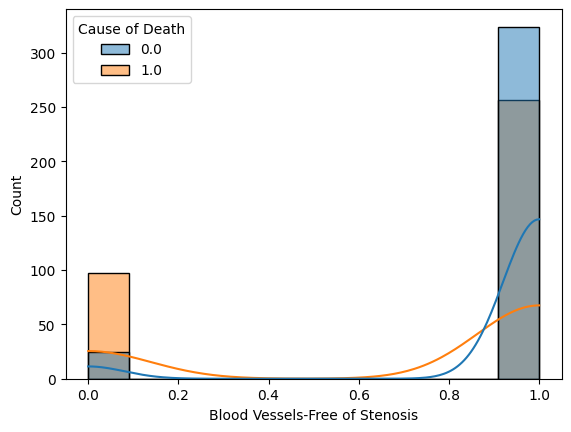

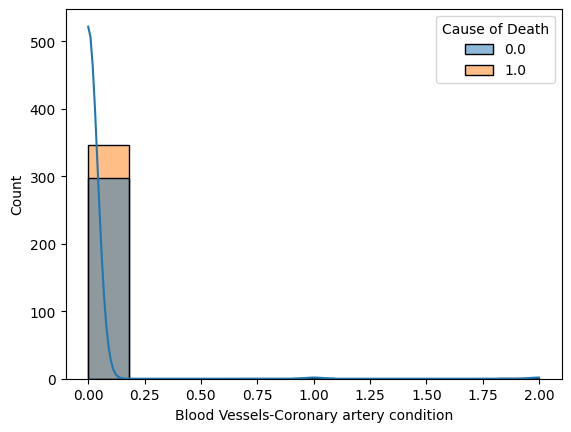

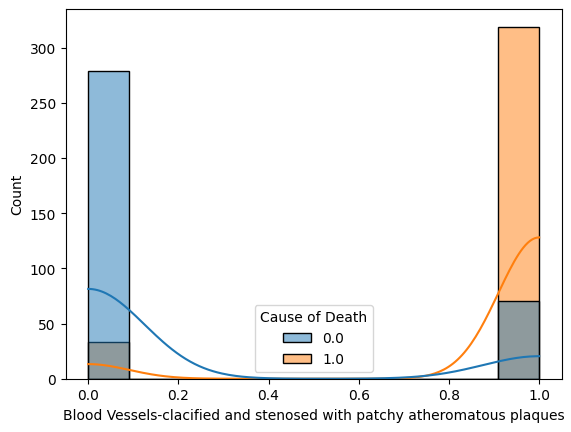

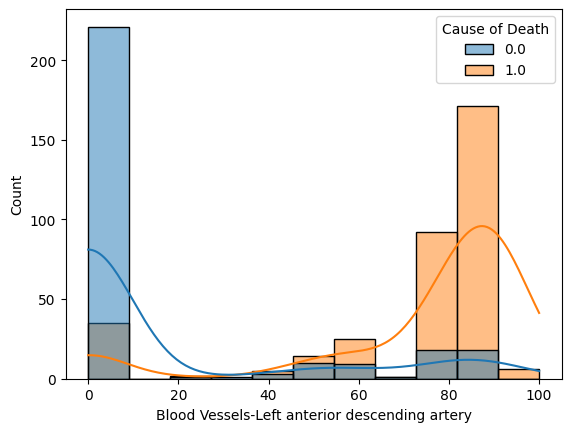

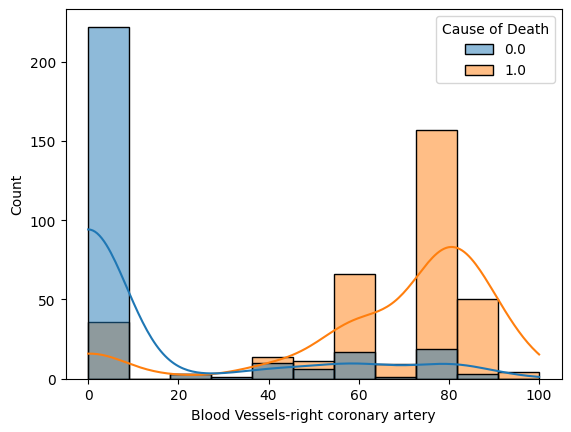

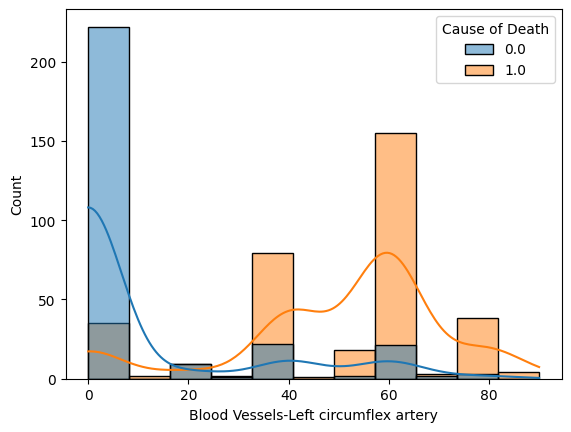

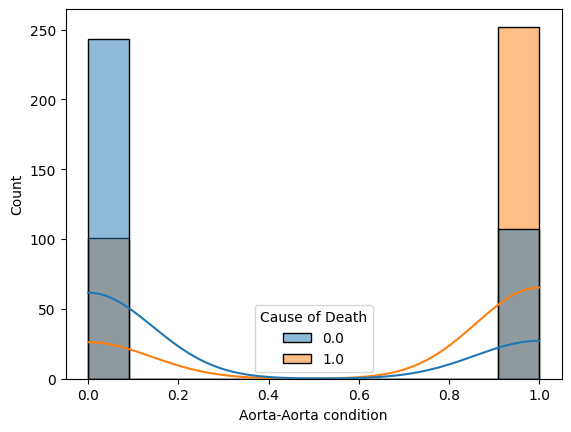

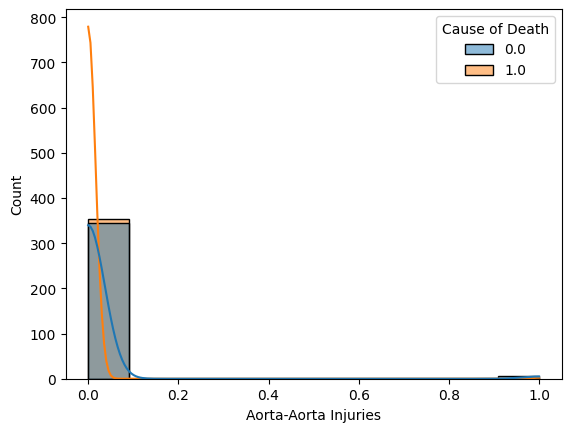

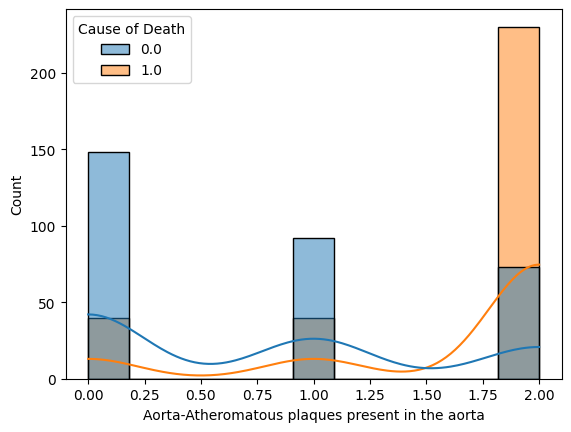

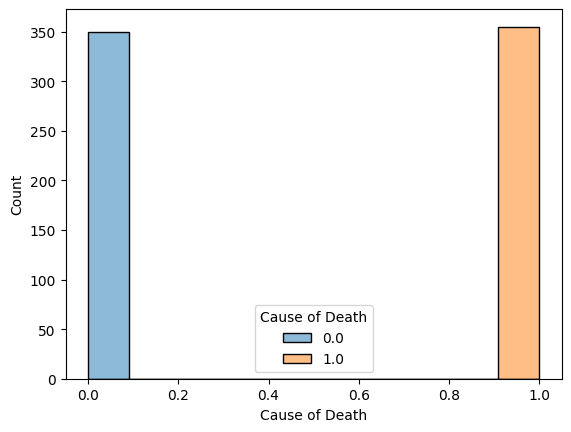

In [13]:
# Histogram to understand the distribution
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data = df, x = i, kde=True, hue= "Cause of Death")
  plt.show()

### **Checking for Outliers**

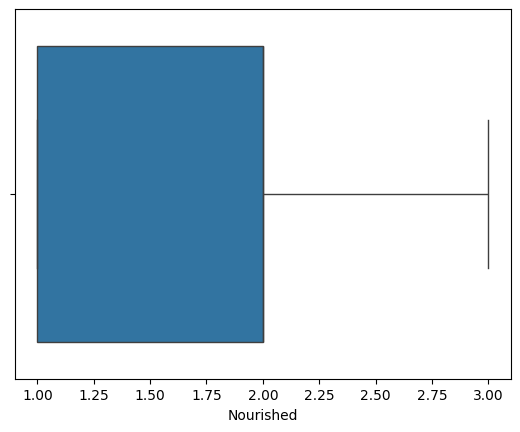

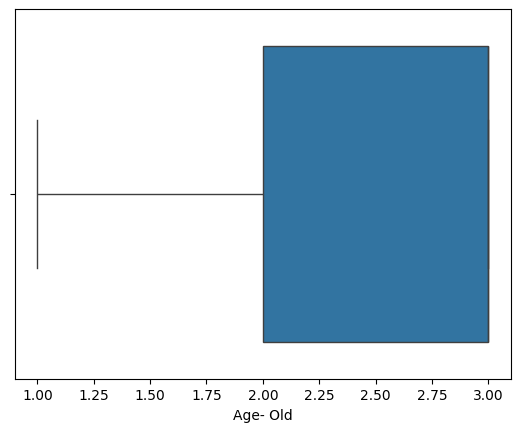

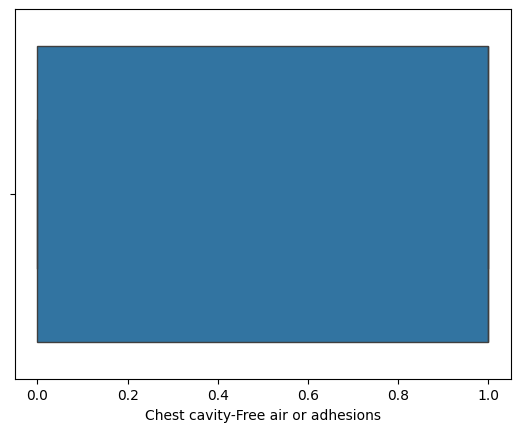

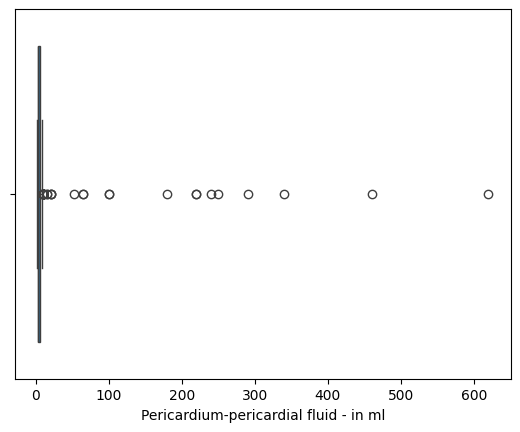

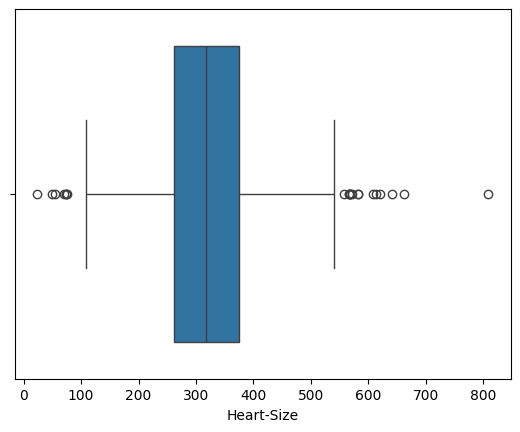

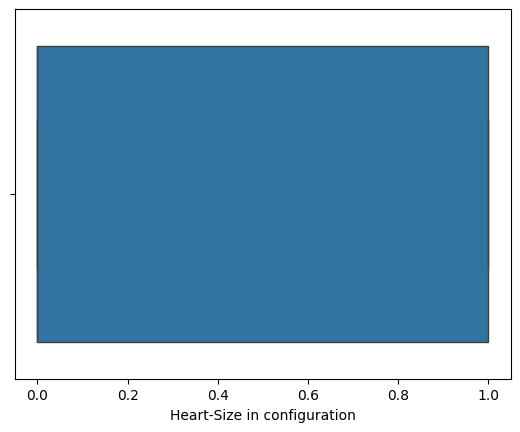

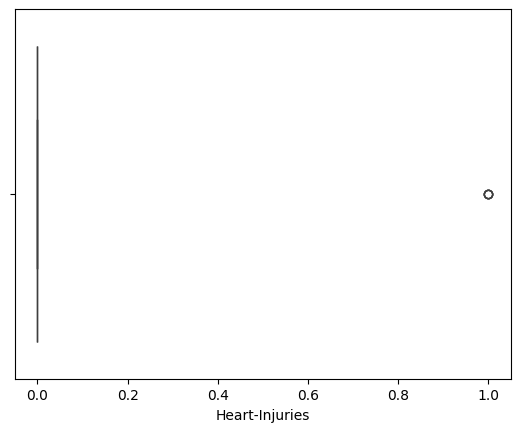

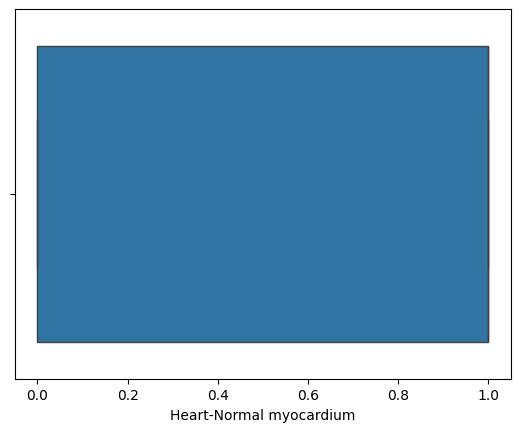

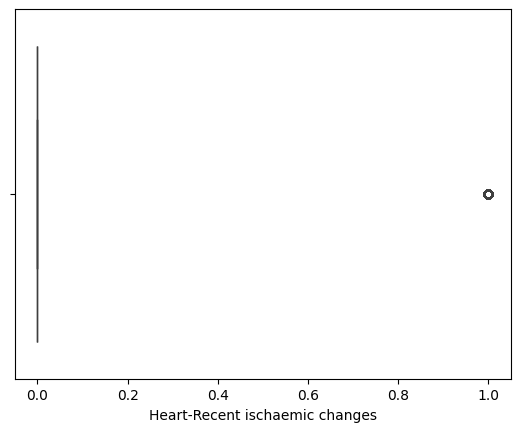

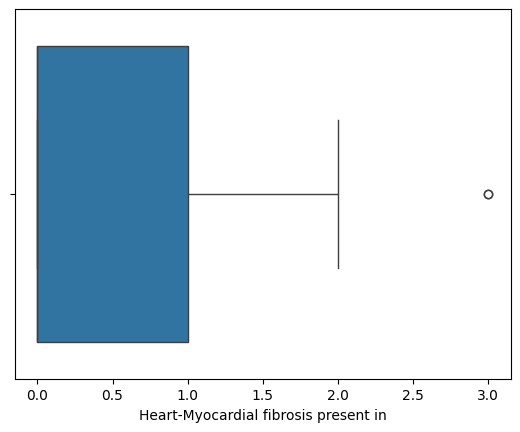

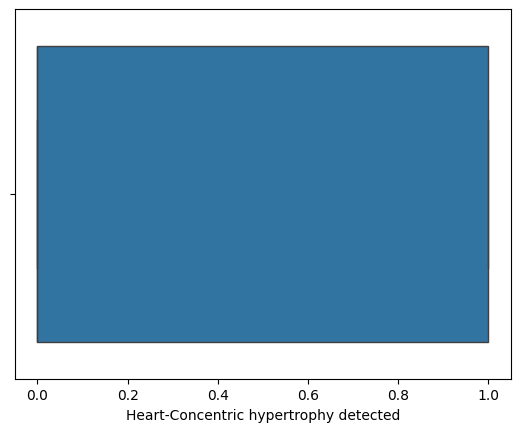

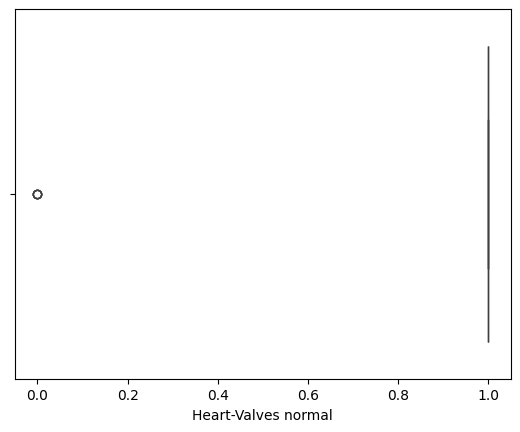

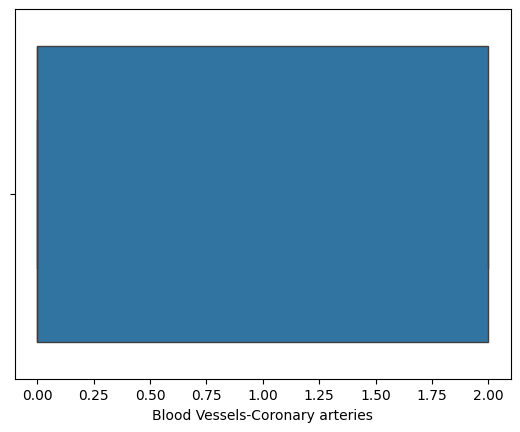

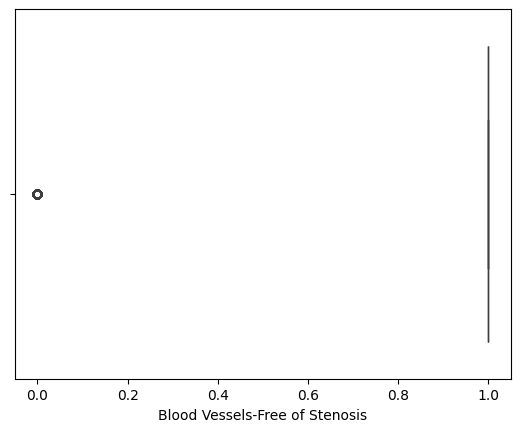

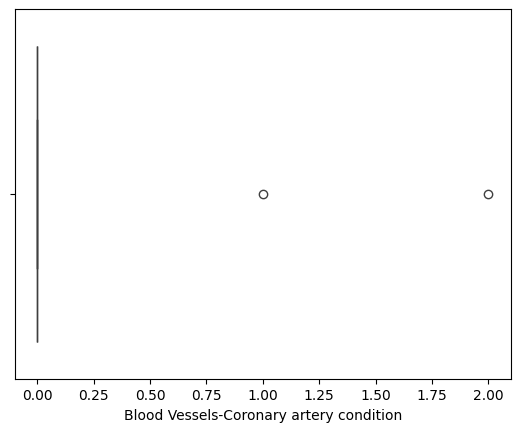

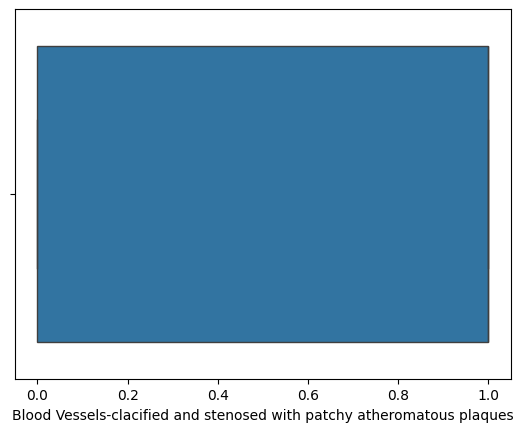

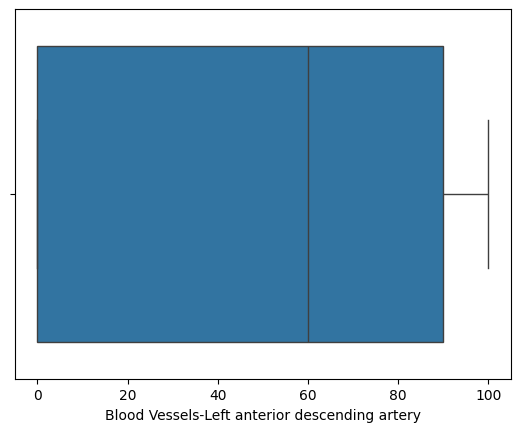

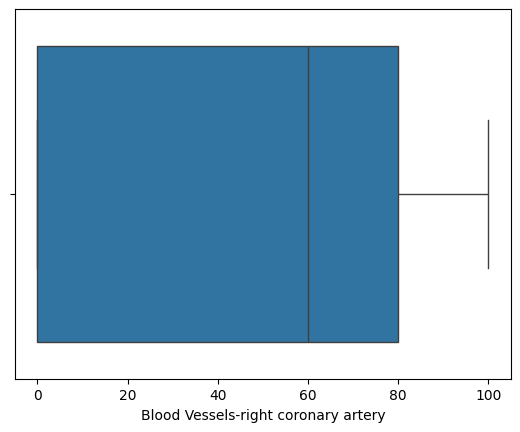

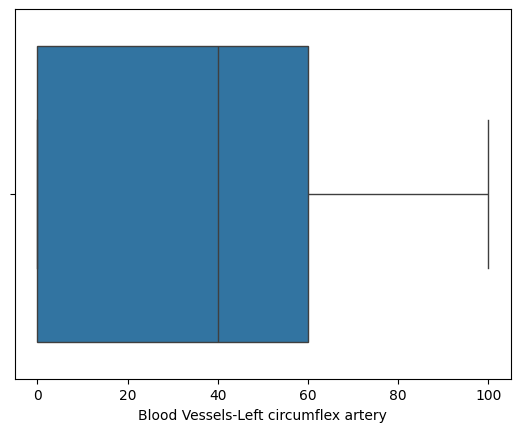

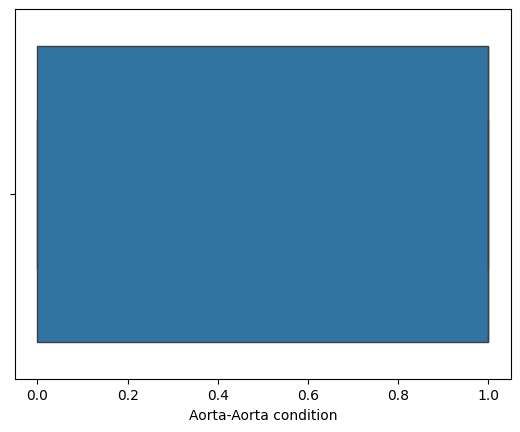

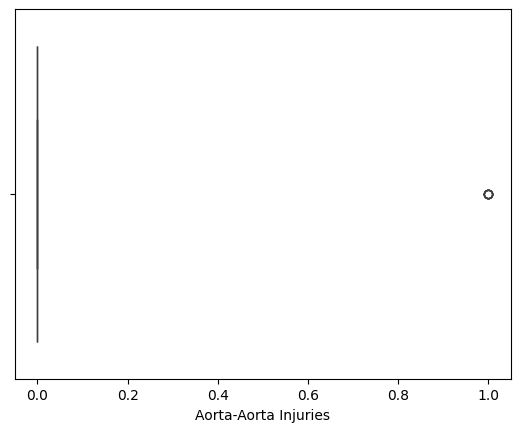

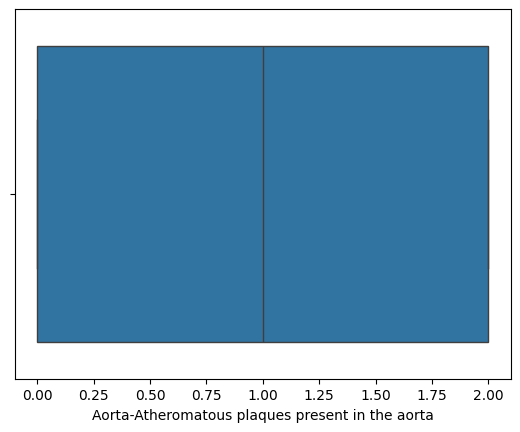

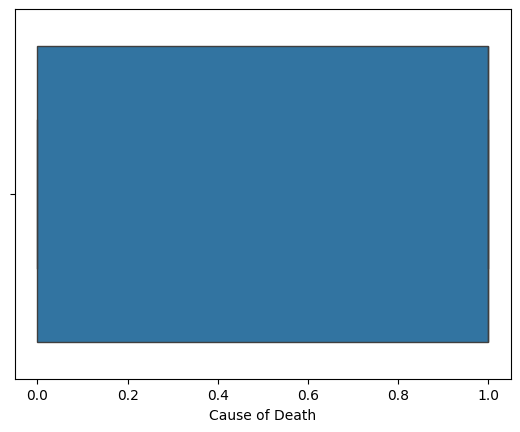

In [14]:
# Boxplot to identify the Outliers in the dataset
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data = df, x = i)
  plt.show()

# **Missing Value Treatments**

In [15]:
new_df = df.copy()

### **Remove Duplicates**

In [16]:
# Check for duplicate data
print("Duplicate values, before handling: ", new_df.duplicated().sum())

# If there are, handle duplicate valuse and garbage values
new_df = new_df.drop_duplicates()

# Check for duplicate data
print("Duplicate values, after handling: ", new_df.duplicated().sum())

Duplicate values, before handling:  38
Duplicate values, after handling:  0


In [17]:
new_df[new_df.duplicated()]

,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,...,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Blood Vessels-Left anterior descending artery,Blood Vessels-right coronary artery,Blood Vessels-Left circumflex artery,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,Cause of Death


In [18]:
# Remove the 'Cause of Death' null columns
new_df.dropna(subset=['Cause of Death'], inplace=True)

# check for null values in 'Cause of Death' column now
new_df['Cause of Death'].isnull().sum()

np.int64(0)

### **Handling the issues in 'sex' column**

In [19]:
new_df['Sex'].value_counts()

,count
Sex,
M,449
F,209
F,2
M,2


In [20]:
new_df['Sex'] = new_df['Sex'].str.strip()

In [21]:
new_df['Sex'].value_counts()

,count
Sex,
M,451
F,211


In [22]:
new_df.isnull().sum()

,0
Sex,8
Nourished,25
Age- Old,33
Chest cavity-Free air or adhesions,1
Pericardium-pericardial fluid - in ml,104
Heart-Size,42
Heart-Size in configuration,19
Heart-Injuries,3
Heart-Normal myocardium,2
Heart-Recent ischaemic changes,2


### **Handling Null values**

In [23]:
# Replace null values with the most frequent value for columns Sex, Nourished, Age-Old, Free air or adhesions, Size in configuration, Heart-Injuries, Normal myocardium, Valves, Blood Vessels-Free of Stenosis, Blood Vessels-clacified and stenosed with patchy atheromatous plaques
# Aorta-Aorta condition	, Aorta-Aorta Injuries
new_df['Sex'].fillna(new_df['Sex'].mode()[0], inplace=True)
new_df['Nourished'].fillna(new_df['Nourished'].mode()[0], inplace=True)
new_df['Age- Old'].fillna(new_df['Age- Old'].mode()[0], inplace=True)
new_df['Chest cavity-Free air or adhesions'].fillna(new_df['Chest cavity-Free air or adhesions'].mode()[0], inplace=True)
new_df['Heart-Size in configuration'].fillna(new_df['Heart-Size in configuration'].mode()[0], inplace=True)
new_df['Heart-Injuries'].fillna(new_df['Heart-Injuries'].mode()[0], inplace=True)
new_df['Heart-Normal myocardium'].fillna(new_df['Heart-Normal myocardium'].mode()[0], inplace=True)
new_df['Heart-Valves normal'].fillna(new_df['Heart-Valves normal'].mode()[0], inplace=True)
new_df['Blood Vessels-Free of Stenosis'].fillna(new_df['Blood Vessels-Free of Stenosis'].mode()[0], inplace=True)
new_df['Blood Vessels-clacified and stenosed with patchy atheromatous plaques'].fillna(new_df['Blood Vessels-clacified and stenosed with patchy atheromatous plaques'].mode()[0], inplace=True)
new_df['Aorta-Aorta condition'].fillna(new_df['Aorta-Aorta condition'].mode()[0], inplace=True)
new_df['Aorta-Aorta Injuries'].fillna(new_df['Aorta-Aorta Injuries'].mode()[0], inplace=True)

# Use the mean or median value for columns Heart Size, Pericardial fluid
# For Heart-Size, the code calculates the mean within groups defined by 'Heart-Size in configuration', then fills the missing values in those column with their respective group means.
new_df['Heart-Size'] = new_df.groupby('Heart-Size in configuration')['Heart-Size'].transform(lambda x: x.fillna(x.mean()))

new_df['Pericardium-pericardial fluid - in ml'].fillna(new_df['Pericardium-pericardial fluid - in ml'].mean(), inplace=True)


# List of value columns to fill with 0
value_columns_to_fill = ['Blood Vessels-Left anterior descending artery', 'Blood Vessels-right coronary artery', 'Blood Vessels-Left circumflex artery']

# Loop through each column to fill
for col in value_columns_to_fill:
    # Fill rows where 'Cause of Death' == 0 and the column has a null value
    new_df.loc[(new_df['Cause of Death'] == 0) & (new_df[col].isnull()), col] = 0

    # Fill rows where 'Cause of Death' == 1 and the column has a null value
    mean_value = new_df[col].mean(skipna=True)  # Calculate the mean excluding NaNs
    new_df.loc[(new_df['Cause of Death'] == 1) & (new_df[col].isnull()), col] = mean_value

# List of category columns to fill with 0
category_columns_to_fill = ['Heart-Recent ischaemic changes','Heart-Myocardial fibrosis present in','Heart-Concentric hypertrophy detected','Aorta-Atheromatous plaques present in the aorta','Blood Vessels-Coronary arteries','Blood Vessels-Coronary artery condition']

# Loop through each column to fill
for col in category_columns_to_fill:
    # Fill rows where 'Cause of Death' == 0 and the column has a null value
    new_df.loc[(new_df['Cause of Death'] == 0) & (new_df[col].isnull()), col] = 0

    # Fill rows where 'Cause of Death' == 1 and the column has a null value
    mode_value = new_df[col].mode()[0]  # Calculate the mode excluding NaNs
    new_df.loc[(new_df['Cause of Death'] == 1) & (new_df[col].isnull()), col] = mode_value



<ipython-input-23-000e891f7b81>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['Sex'].fillna(new_df['Sex'].mode()[0], inplace=True)
<ipython-input-23-000e891f7b81>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [24]:
new_df.isnull().sum()

,0
Sex,0
Nourished,0
Age- Old,0
Chest cavity-Free air or adhesions,0
Pericardium-pericardial fluid - in ml,0
Heart-Size,0
Heart-Size in configuration,0
Heart-Injuries,0
Heart-Normal myocardium,0
Heart-Recent ischaemic changes,0


# **Encoding of Data**

In [25]:
# Label Encoding Categorical Features
# Identify categorical columns

categorical_cols = new_df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Sex'], dtype='object')


In [26]:
# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
    label_encoders[col] = le  # Save the encoder for future use (e.g., inverse_transform)

In [27]:
categorical_cols = new_df.select_dtypes(include=['object']).columns
print(categorical_cols)


for label, encoded_value in zip(label_encoders['Sex'].classes_, label_encoders['Sex'].transform(label_encoders['Sex'].classes_)):
    print(f"{label}: {encoded_value}")  # Print label and encoded value together


Index([], dtype='object')
F: 0
M: 1


# **Correlation Analysis using Heatmap**

In [28]:
new_df.corr()

,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,...,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Blood Vessels-Left anterior descending artery,Blood Vessels-right coronary artery,Blood Vessels-Left circumflex artery,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,Cause of Death
Sex,1.000000,-2.019985e-01,-0.151682,-0.037175,-0.024814,0.199394,0.082820,0.010833,0.067515,0.028392,...,0.014567,-0.076551,0.019711,0.038644,0.023310,0.041612,-0.028703,-1.588186e-02,-0.020383,0.032616
Nourished,-0.201999,1.000000e+00,0.192478,-0.017086,-0.051890,-0.301665,-0.163438,0.017235,0.029953,-0.038574,...,0.056359,0.056431,-0.025883,-0.040216,-0.017245,-0.032832,0.063803,-3.791257e-19,0.083788,-0.061967
Age- Old,-0.151682,1.924781e-01,1.000000,-0.062977,-0.042559,0.119348,0.075998,-0.036036,0.014291,0.015306,...,-0.103662,-0.018105,0.194705,0.205885,0.199142,0.176637,0.267285,-7.053711e-02,0.388492,0.156396
Chest cavity-Free air or adhesions,-0.037175,-1.708611e-02,-0.062977,1.000000,0.053153,0.029154,0.011280,0.011536,-0.025223,-0.083572,...,-0.284618,0.035556,0.004741,-0.024486,-0.015765,-0.029955,-0.024931,2.220623e-02,-0.123258,-0.047402
Pericardium-pericardial fluid - in ml,-0.024814,-5.189046e-02,-0.042559,0.053153,1.000000,0.044743,0.017392,-0.011742,-0.002335,0.040101,...,-0.051270,-0.006282,0.046308,0.056220,0.043840,0.049646,0.050966,-1.141612e-02,0.006517,0.110750
Heart-Size,0.199394,-3.016649e-01,0.119348,0.029154,0.044743,1.000000,0.611598,-0.011024,-0.083698,0.181268,...,-0.077455,-0.061431,0.220916,0.226144,0.219411,0.244038,0.169288,-1.440246e-02,0.209316,0.287653
Heart-Size in configuration,0.082820,-1.634376e-01,0.075998,0.011280,0.017392,0.611598,1.000000,-0.007246,-0.039549,0.172896,...,-0.063233,-0.033375,0.181427,0.199170,0.210279,0.215536,0.166327,-5.575875e-02,0.185045,0.272584
Heart-Injuries,0.010833,1.723511e-02,-0.036036,0.011536,-0.011742,-0.011024,-0.007246,1.000000,-0.084157,0.087948,...,-0.018334,-0.004022,0.029042,0.040314,0.049186,0.055058,-0.003706,-6.719966e-03,-0.018489,0.037597
Heart-Normal myocardium,0.067515,2.995345e-02,0.014291,-0.025223,-0.002335,-0.083698,-0.039549,-0.084157,1.000000,-0.471571,...,0.134260,-0.007573,-0.125270,-0.117470,-0.134312,-0.164585,-0.085634,1.343067e-02,-0.072983,-0.145860
Heart-Recent ischaemic changes,0.028392,-3.857405e-02,0.015306,-0.083572,0.040101,0.181268,0.172896,0.087948,-0.471571,1.000000,...,0.026151,-0.030383,0.348818,0.381803,0.381194,0.396963,0.229054,-1.098317e-02,0.232907,0.378144


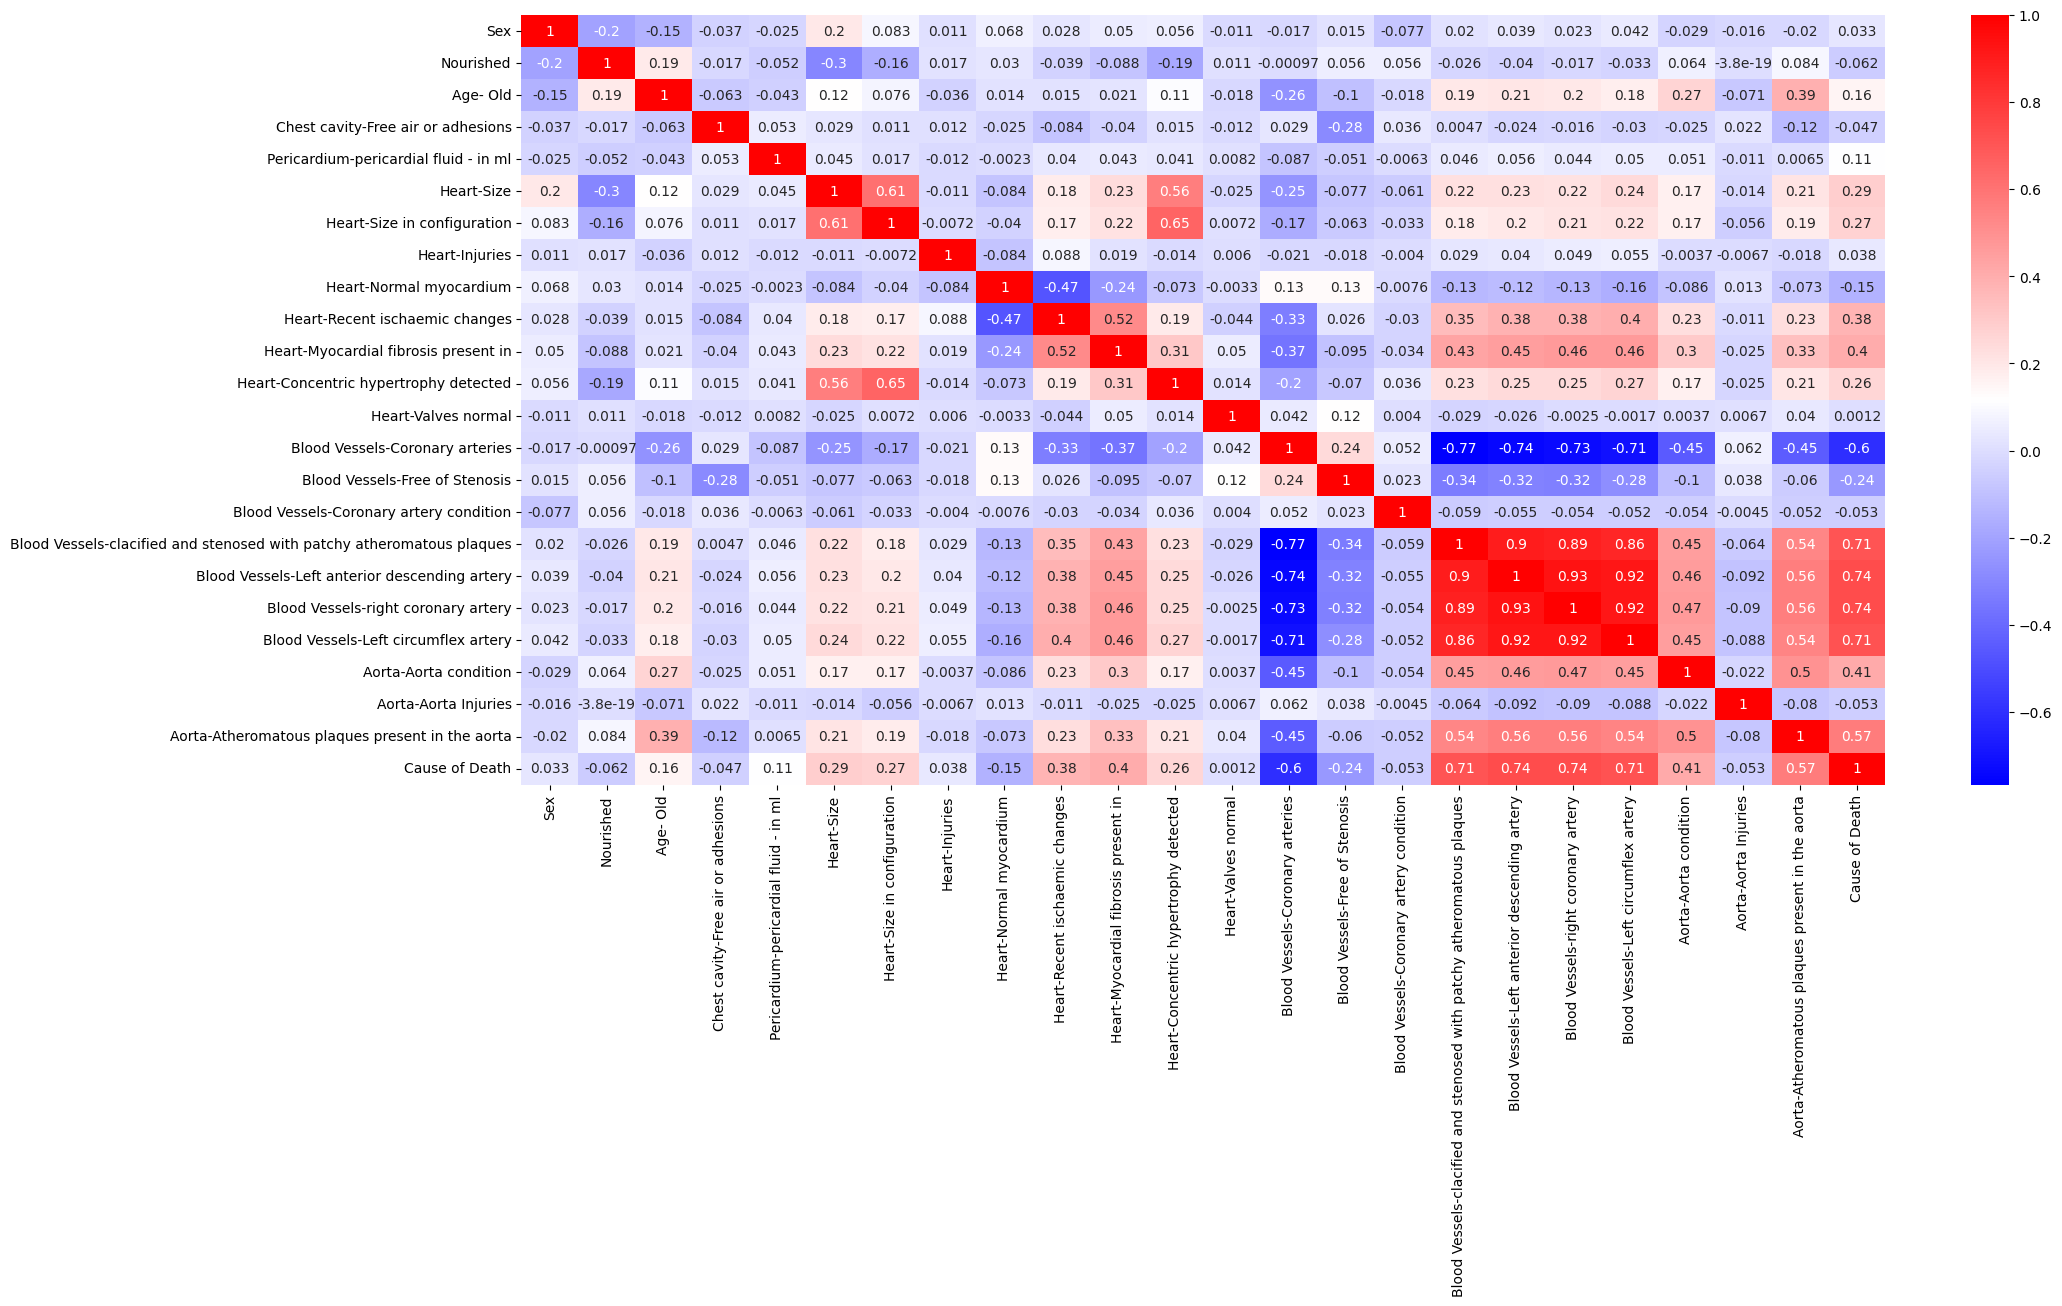

In [29]:
plt.figure(figsize=(22,10))
sns.heatmap(new_df.corr(), cmap='bwr', annot=True)
plt.show()

**Split the target variable and the other feature columns**

In [34]:
# Example: Split into features (X) and target (y)
X = new_df.drop(columns=["Cause of Death"])  # Exclude target
y = new_df["Cause of Death"]  # Target variable

***If going to remove the highly correlated features***

In [31]:
# # Calculate correlation matrix for features only
# corr_matrix = X.corr().abs()

# # Select the upper triangle of the correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find features with correlation higher than the threshold (e.g., 0.8)
# threshold = 0.8
# to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# # Drop highly correlated features from the feature set
# X_reduced = X.drop(columns=to_drop)

# # If needed, combine reduced features with the target
# df_reduced = pd.concat([X_reduced, y], axis=1)

# # Output the result
# print("Dropped features:", to_drop)
# print("Reduced dataset shape:", df_reduced.shape)

### **Doing the PCA and reduce the highly correlated columns into one column**

In [32]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X[['Blood Vessels-Left anterior descending artery', 'Blood Vessels-right coronary artery', 'Blood Vessels-Left circumflex artery','Blood Vessels-clacified and stenosed with patchy atheromatous plaques']])

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)  # Reduce to one component
principal_component = pca.fit_transform(scaled_features)

# Add PCA component to data
X["PCA_Component"] = principal_component
X.drop(columns=['Blood Vessels-Left anterior descending artery', 'Blood Vessels-right coronary artery', 'Blood Vessels-Left circumflex artery','Blood Vessels-clacified and stenosed with patchy atheromatous plaques'], inplace=True)

print("Data After PCA:\n", X.head())

Data After PCA:
    Sex  Nourished  Age- Old  Chest cavity-Free air or adhesions  \
0    1        1.0       1.0                                 1.0   
2    1        1.0       3.0                                 1.0   
5    1        3.0       3.0                                 1.0   
6    1        1.0       3.0                                 1.0   
7    1        1.0       1.0                                 1.0   

   Pericardium-pericardial fluid - in ml  Heart-Size  \
0                                    3.0  276.000000   
2                                    3.0  492.000000   
5                                    3.0  288.638581   
6                                   10.0  411.067797   
7                                    3.0  288.638581   

   Heart-Size in configuration  Heart-Injuries  Heart-Normal myocardium  \
0                          0.0             0.0                      1.0   
2                          1.0             0.0                      0.0   
5                 

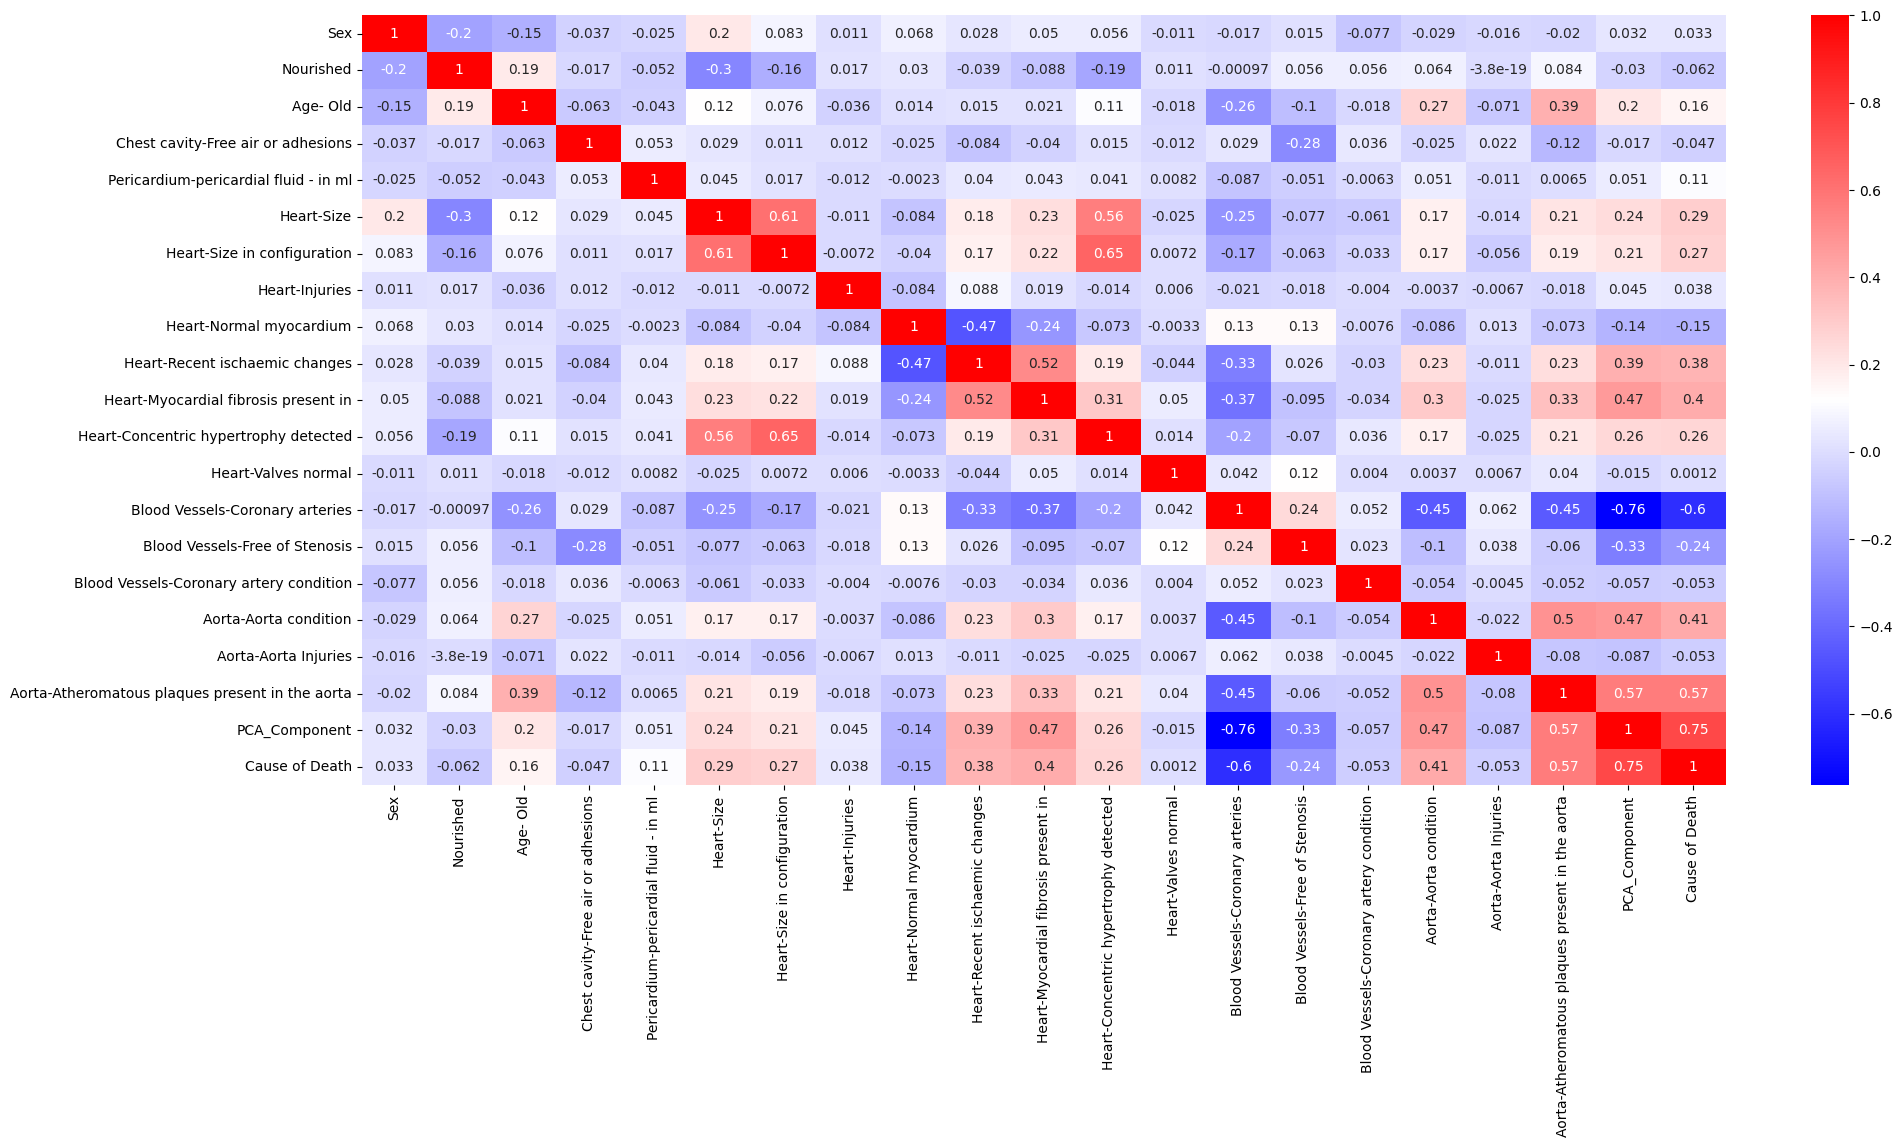

In [33]:
# X + y into a variable called final
final = pd.concat([X, y], axis=1)

plt.figure(figsize=(22,10))
sns.heatmap(final.corr(), cmap='bwr', annot=True)
plt.show()

# **Standardisation**

In [ ]:
# Standardisation
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
X.head()

,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,Heart-Myocardial fibrosis present in,Heart-Concentric hypertrophy detected,Heart-Valves normal,Blood Vessels-Coronary arteries,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,PCA_Component
0,1,1.0,1.0,1.0,3.0,276.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,-2.121886
2,1,1.0,3.0,1.0,3.0,492.000000,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.961195
5,1,3.0,3.0,1.0,3.0,288.638581,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.427405
6,1,1.0,3.0,1.0,10.0,411.067797,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.255726
7,1,1.0,1.0,1.0,3.0,288.638581,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.471012


# **Model building - Random Forest Classifier**

### **Train-test split**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### **Random Forest Classifier 1**

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier_1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on both training and testing
y_train_pred = rf_classifier_1.predict(X_train)
y_test_pred = rf_classifier_1.predict(X_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)*100
print(f"Training Accuracy: {train_accuracy}")
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# Evaluate on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)*100
print(f"Testing Accuracy: {test_accuracy}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test,y_test_pred))

Training Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       267
         1.0       1.00      1.00      1.00       269

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

Testing Accuracy: 85.07462686567165
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        63
         1.0       0.86      0.86      0.86        71

    accuracy                           0.85       134
   macro avg       0.85      0.85      0.85       134
weighted avg       0.85      0.85      0.85       134

Confusion Matrix:
 [[53 10]
 [10 61]]


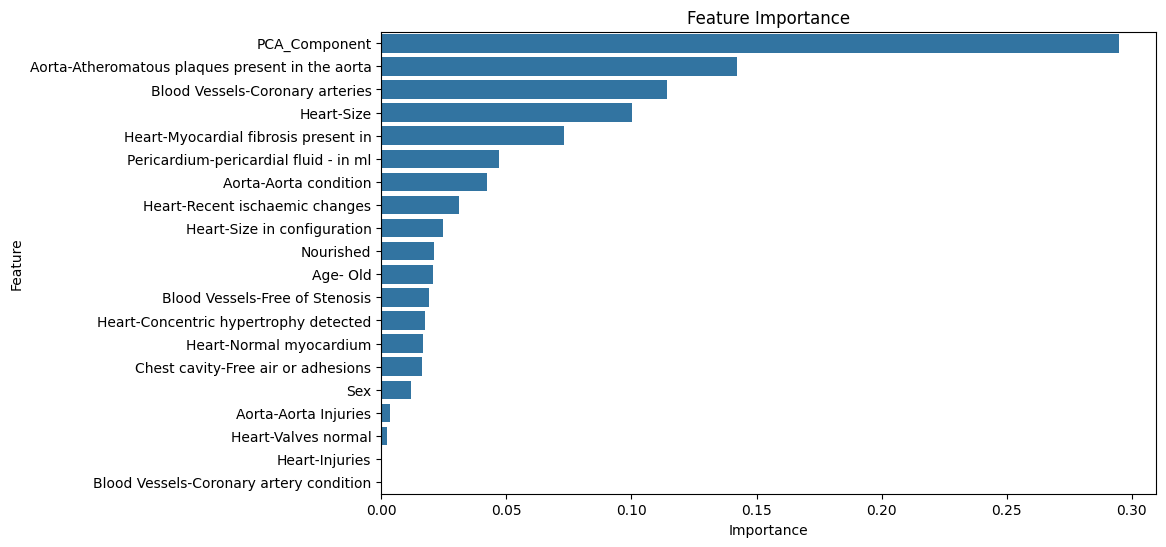


Feature Importance:
                                             Feature  Importance
19                                    PCA_Component    0.294943
18  Aorta-Atheromatous plaques present in the aorta    0.142345
13                  Blood Vessels-Coronary arteries    0.114125
5                                        Heart-Size    0.100393
10             Heart-Myocardial fibrosis present in    0.072966
4             Pericardium-pericardial fluid - in ml    0.047239
16                            Aorta-Aorta condition    0.042366
9                    Heart-Recent ischaemic changes    0.031188
6                       Heart-Size in configuration    0.024863
1                                         Nourished    0.020937
2                                          Age- Old    0.020552
14                   Blood Vessels-Free of Stenosis    0.019177
11            Heart-Concentric hypertrophy detected    0.017597
8                           Heart-Normal myocardium    0.016605
3                C

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier_1.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

print()

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier_1.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

In [ ]:
cv_scores = cross_val_score(rf_classifier_1, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", cv_scores.mean()*100)

Cross-validation Accuracy: 86.11940298507463


### **Random Forest Classifier 2 - Including HyperParameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
# Initialize the Random Forest Classifier
rf_classifier_2 = RandomForestClassifier(n_estimators=200,max_depth=7, min_samples_split=2, min_samples_leaf=2, random_state=42)

# Train the model
rf_classifier_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

In [ ]:
# Make predictions on both training and testing
y_train_pred = rf_classifier_2.predict(X_train)
y_test_pred = rf_classifier_2.predict(X_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)*100
print(f"Training Accuracy: {train_accuracy}")
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# Evaluate on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)*100
print(f"Testing Accuracy: {test_accuracy}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test,y_test_pred))

Training Accuracy: 93.84328358208955
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       267
         1.0       0.92      0.96      0.94       269

    accuracy                           0.94       536
   macro avg       0.94      0.94      0.94       536
weighted avg       0.94      0.94      0.94       536

Testing Accuracy: 87.31343283582089
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86        63
         1.0       0.88      0.89      0.88        71

    accuracy                           0.87       134
   macro avg       0.87      0.87      0.87       134
weighted avg       0.87      0.87      0.87       134

Confusion Matrix:
 [[54  9]
 [ 8 63]]


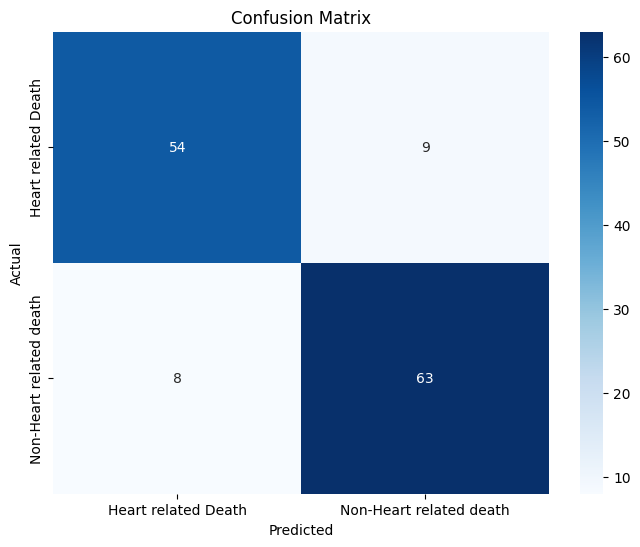

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Genarate Confussion matrix for rf_classifier_2
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Heart related Death', 'Non-Heart related death'], yticklabels=['Heart related Death', 'Non-Heart related death'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


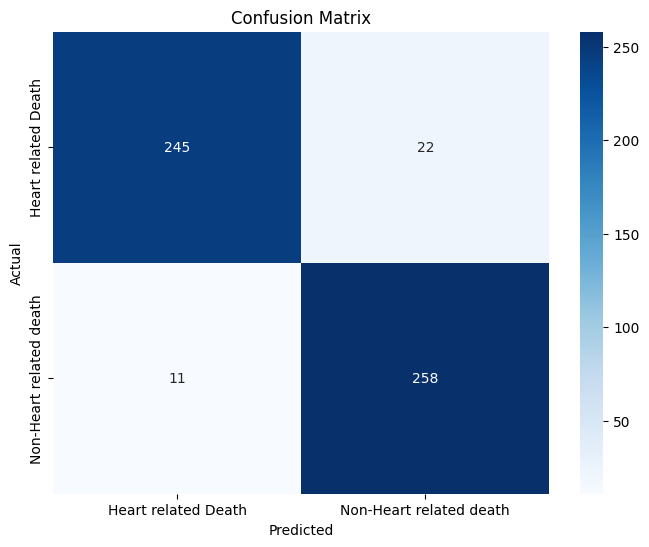

In [ ]:
# Training data confussion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Heart related Death', 'Non-Heart related death'], yticklabels=['Heart related Death', 'Non-Heart related death'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

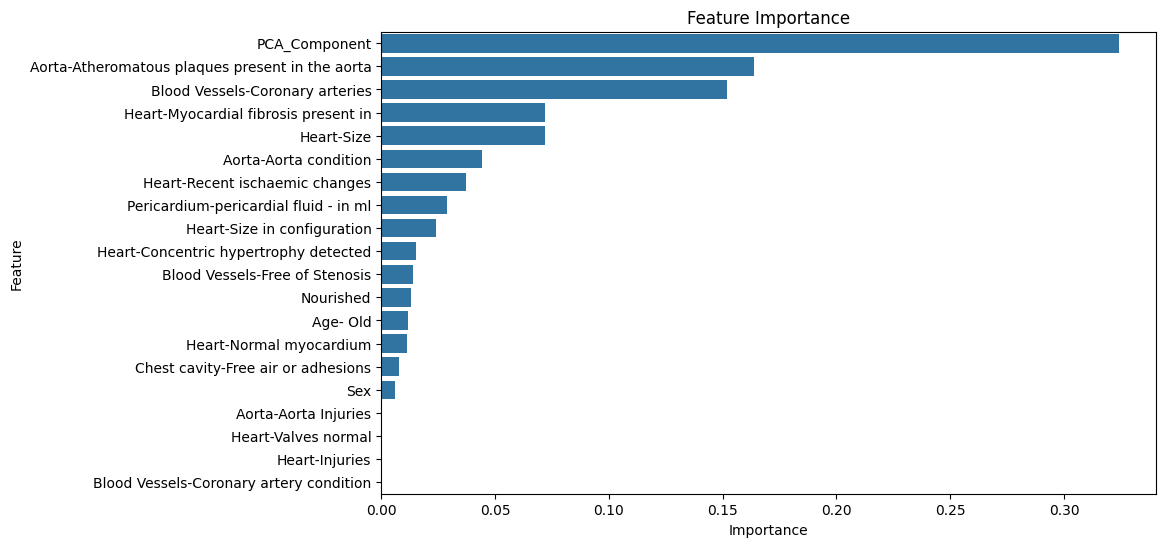


Feature Importance:
                                             Feature  Importance
19                                    PCA_Component    0.324255
18  Aorta-Atheromatous plaques present in the aorta    0.163763
13                  Blood Vessels-Coronary arteries    0.152141
10             Heart-Myocardial fibrosis present in    0.072087
5                                        Heart-Size    0.072016
16                            Aorta-Aorta condition    0.044432
9                    Heart-Recent ischaemic changes    0.037443
4             Pericardium-pericardial fluid - in ml    0.029089
6                       Heart-Size in configuration    0.023876
11            Heart-Concentric hypertrophy detected    0.015464
14                   Blood Vessels-Free of Stenosis    0.014165
1                                         Nourished    0.012911
2                                          Age- Old    0.011696
8                           Heart-Normal myocardium    0.011461
3                C

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier_2.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

print()

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier_2.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

In [ ]:
cv_scores = cross_val_score(rf_classifier_2, X_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validation Accuracy: 0.8672 ± 0.0311


***Feature Extraction & Pruning***

In [ ]:
# Define a threshold for feature importance
threshold = 0.01  # Features with importance below this will be pruned

# Filter the features based on importance
important_features = feature_importance[feature_importance['Importance'] > threshold]['Feature'].tolist()

# Select only important features in the dataset
pruned_df = X[important_features]  # Keep the target variable


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas import DataFrame

# Compute VIF
# X = pruned_df.drop('Cause of Death', axis=1)  # Exclude the target variable
vif_data = DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display features with high VIF
print(vif_data[vif_data['VIF'] > 5])  # Adjust the threshold as needed


                                            Feature        VIF
1                                         Nourished   7.723298
2                                          Age- Old  17.857061
5                                        Heart-Size  24.569350
12                              Heart-Valves normal  47.777105
14                   Blood Vessels-Free of Stenosis   8.491703
18  Aorta-Atheromatous plaques present in the aorta   5.554155


In [ ]:
# Calculate correlation matrix
corr_matrix = X.corr()

# Check pairs of highly correlated features (correlation > 0.9 or < -0.9)
highly_corr_features = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
                        if abs(corr_matrix[col1][col2]) > 0.9 and col1 != col2]

print(highly_corr_features)


[]


### **Shap Values for the contributions**

In [ ]:
import shap

# Train the model (e.g., Random Forest)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Initialize SHAP explainer
explainer = shap.Explainer(model, X)

# Calculate SHAP values
shap_values = explainer(X)

# If your model is a binary classifier, shap_values will have two arrays (for class 0 and class 1).
# Select the SHAP values for one of the classes:
shap_values_class = shap_values[..., 1]  # Use class 1 (positive class)

# Check the shape of shap_values_class and X to ensure they match
print(f"SHAP values shape: {shap_values_class.shape}, X shape: {X.shape}")


 97%|=================== | 1296/1340 [00:24<00:00]       

SHAP values shape: (670, 20), X shape: (670, 20)


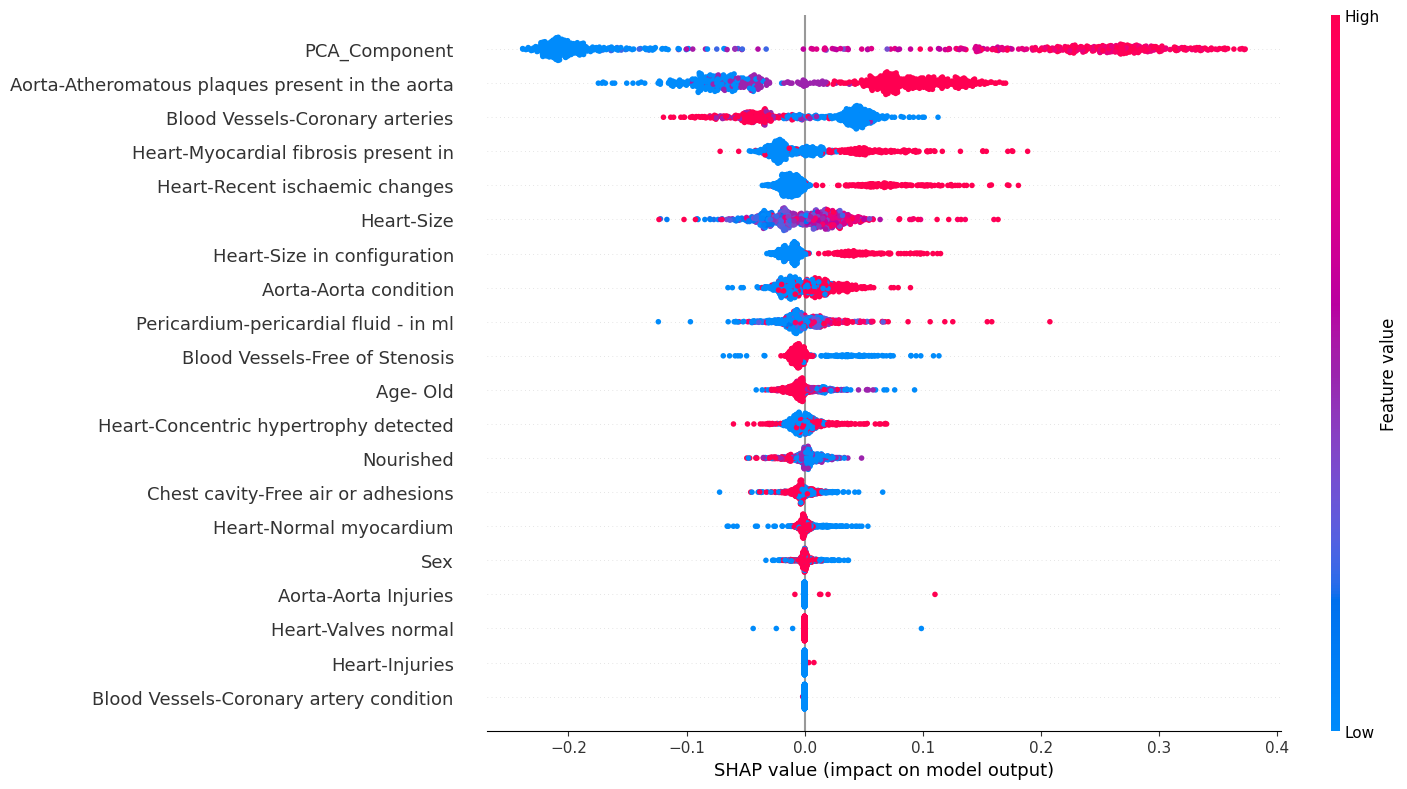

In [ ]:
# Plot global feature importance (summary plot)
# Create the summary plot with a larger size
shap.summary_plot(shap_values[..., 1], X, plot_size=(15,8))  # Adjust the size as needed

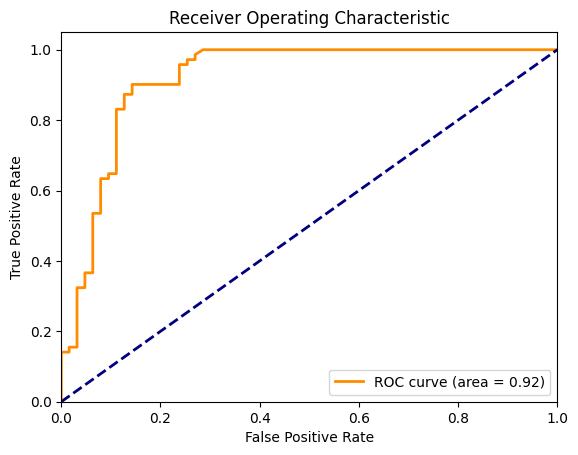

In [ ]:
# prompt: AUC - Roc curve for the Random forest model_2

from sklearn.metrics import roc_curve, auc

# Assuming rf_classifier_2 is your trained model and X_test, y_test are your test data
y_prob = rf_classifier_2.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Export the model 'rf_classifier_2' in to a pickel file
import pickle
with open('rf_classifier_2.pkl', 'wb') as file:
    pickle.dump(rf_classifier_2, file)

# **Model building - XGBoost**

### **XGBoost Model 1**

XGBoost Model Evaluation:
Training Accuracy: 100.0
Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       236
         1.0       1.00      1.00      1.00       233

    accuracy                           1.00       469
   macro avg       1.00      1.00      1.00       469
weighted avg       1.00      1.00      1.00       469

Testing Accuracy: 82.58706467661692
Testing Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.80      0.81        94
         1.0       0.83      0.85      0.84       107

    accuracy                           0.83       201
   macro avg       0.83      0.82      0.82       201
weighted avg       0.83      0.83      0.83       201

Confusion Matrix:
 [[75 19]
 [16 91]]


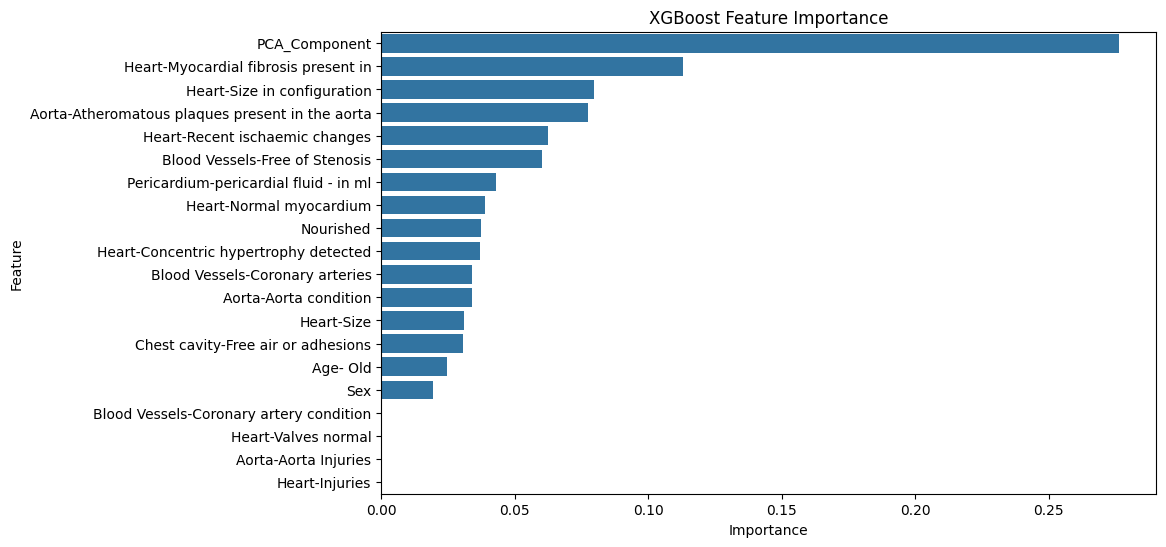

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_scaled and y are already defined from the previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print("XGBoost Model Evaluation:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)*100}")
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred)*100}")
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('XGBoost Feature Importance')
plt.show()

### **XGBoost model 2 - Including HyperParameters**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.1 MB/s eta 0:00:00


In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best Parameters:", study.best_params)


[I 2025-03-16 12:40:55,641] A new study created in memory with name: no-name-8140c9e9-76c0-498e-936f-bb40dcff8cdb
[I 2025-03-16 12:40:55,905] Trial 0 finished with value: 0.8258706467661692 and parameters: {'n_estimators': 243, 'max_depth': 4, 'learning_rate': 0.29429646424714395, 'subsample': 0.5367573590160726, 'colsample_bytree': 0.6502332915612883}. Best is trial 0 with value: 0.8258706467661692.
[I 2025-03-16 12:40:57,201] Trial 1 finished with value: 0.845771144278607 and parameters: {'n_estimators': 106, 'max_depth': 10, 'learning_rate': 0.2826463007678652, 'subsample': 0.6661790528985247, 'colsample_bytree': 0.529803284874653}. Best is trial 1 with value: 0.845771144278607.
[I 2025-03-16 12:40:57,535] Trial 2 finished with value: 0.835820895522388 and parameters: {'n_estimators': 241, 'max_depth': 5, 'learning_rate': 0.12695306838785922, 'subsample': 0.9075380366798429, 'colsample_bytree': 0.6173493444765761}. Best is trial 1 with value: 0.845771144278607.
[I 2025-03-16 12:40:5

Best Parameters: {'n_estimators': 57, 'max_depth': 7, 'learning_rate': 0.06453714941540226, 'subsample': 0.8149343597978231, 'colsample_bytree': 0.9762944580093247}


XGBoost Model Evaluation:
Training Accuracy: 96.16204690831557
Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       236
         1.0       0.95      0.97      0.96       233

    accuracy                           0.96       469
   macro avg       0.96      0.96      0.96       469
weighted avg       0.96      0.96      0.96       469

Testing Accuracy: 86.56716417910447
Testing Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.85        94
         1.0       0.86      0.90      0.88       107

    accuracy                           0.87       201
   macro avg       0.87      0.86      0.86       201
weighted avg       0.87      0.87      0.87       201

Confusion Matrix:
 [[78 16]
 [11 96]]


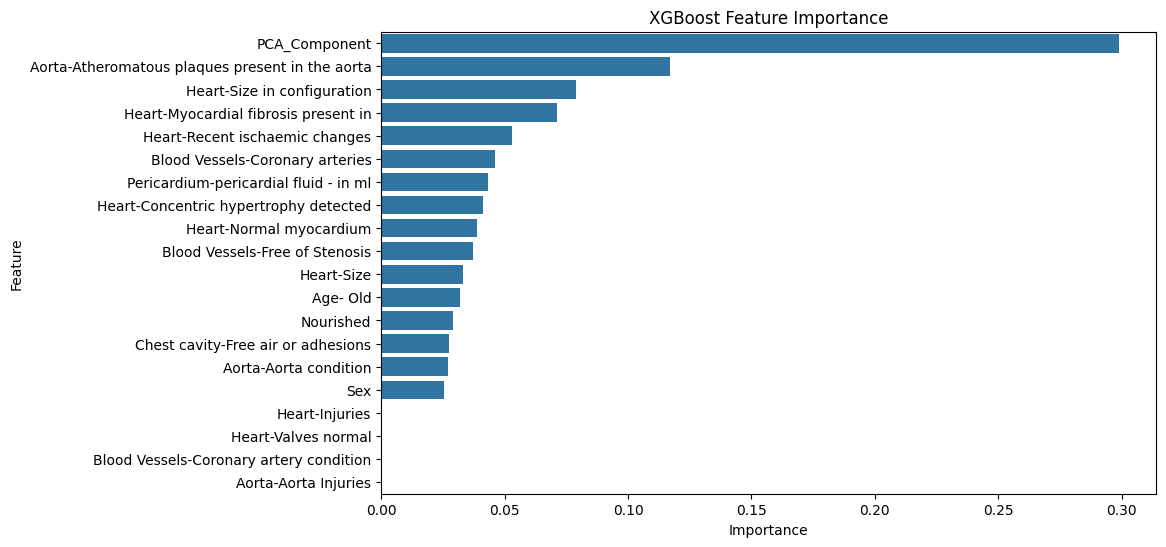

In [ ]:
# Train the XGBoost model with the best parameters
best_params = study.best_params
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

# Make predictions
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Model Evaluation:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)*100}")
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred)*100}")
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_xgb_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('XGBoost Feature Importance')
plt.show()

### **XGBoost cross-validation**

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split

def xgb_cross_validation(X, y, param, num_boost_round=10, nfold=5, metrics=("auc",), seed=42):
    """
    Perform XGBoost cross-validation and display results.

    Args:
        X (np.ndarray or pd.DataFrame): Features.
        y (np.ndarray or pd.Series): Target labels.
        param (dict): XGBoost parameters.
        num_boost_round (int): Number of boosting rounds.
        nfold (int): Number of folds for cross-validation.
        metrics (tuple): Metrics for evaluation (e.g., "auc", "error").
        seed (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame: Cross-validation results as a DataFrame.
    """
    # Convert data to DMatrix format
    dtrain = xgb.DMatrix(X, label=y)

    # Run cross-validation
    print("Running XGBoost cross-validation...")
    cv_results = xgb.cv(
        params=param,
        dtrain=dtrain,
        num_boost_round=num_boost_round,
        nfold=nfold,
        metrics=metrics,
        seed=seed,
        callbacks=[xgb.callback.EvaluationMonitor(show_stdv=True)],
    )

    print("\nCross-validation results:")
    print(cv_results)
    return cv_results


# Define XGBoost parameters
params = {
    "max_depth": 4,
    "eta": 0.1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
}

# Perform cross-validation
cv_results = xgb_cross_validation(X_train, y_train, param=params, num_boost_round=50, nfold=5)

# Access the mean AUC score from the last boosting round
mean_auc = cv_results["test-auc-mean"].iloc[-1]
print(f"\nMean AUC from cross-validation: {mean_auc:.4f}")

# Classification report and confussion matrix for cross validation applied model
y_pred_cv = best_xgb_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_cv))


Running XGBoost cross-validation...
[0]	train-auc:0.94549+0.00550	test-auc:0.90967+0.03198
[1]	train-auc:0.95195+0.00540	test-auc:0.91501+0.02954
[2]	train-auc:0.95765+0.00424	test-auc:0.92353+0.03005
[3]	train-auc:0.95988+0.00378	test-auc:0.92404+0.03007
[4]	train-auc:0.96100+0.00353	test-auc:0.92490+0.02773
[5]	train-auc:0.96158+0.00339	test-auc:0.92629+0.03056
[6]	train-auc:0.96344+0.00347	test-auc:0.92765+0.02499
[7]	train-auc:0.96524+0.00520	test-auc:0.92419+0.02738
[8]	train-auc:0.96675+0.00551	test-auc:0.92611+0.02779
[9]	train-auc:0.96871+0.00586	test-auc:0.92366+0.03233
[10]	train-auc:0.96951+0.00580	test-auc:0.92338+0.03241
[11]	train-auc:0.96981+0.00593	test-auc:0.92443+0.03344
[12]	train-auc:0.97110+0.00559	test-auc:0.92644+0.03467
[13]	train-auc:0.97189+0.00537	test-auc:0.92644+0.03248
[14]	train-auc:0.97447+0.00354	test-auc:0.92435+0.03056
[15]	train-auc:0.97510+0.00346	test-auc:0.92444+0.03073
[16]	train-auc:0.97607+0.00335	test-auc:0.92366+0.02985
[17]	train-auc:0.97675

# **Stacking ensemble model (RF + XGB)**

In [ ]:
# rf_classifier_2 and best_xgb_model together stacking ensemble model using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Assuming rf_classifier_2 and best_xgb_model are already trained

estimators = [
    ('rf', rf_classifier_2),
    ('xgb', best_xgb_model)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5  # Use 5-fold cross-validation for stacking
)

stacking_model.fit(X_train, y_train)

# training
y_train_pred = stacking_model.predict(X_train)
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

# testing
y_pred = stacking_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       267
         1.0       0.94      0.97      0.95       269

    accuracy                           0.95       536
   macro avg       0.95      0.95      0.95       536
weighted avg       0.95      0.95      0.95       536

[[249  18]
 [  8 261]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        63
         1.0       0.89      0.89      0.89        71

    accuracy                           0.88       134
   macro avg       0.88      0.88      0.88       134
weighted avg       0.88      0.88      0.88       134

[[55  8]
 [ 8 63]]


# **Sample ensemble Model (RF + GB + XGB)**

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Generate predictions from the base models
rf_preds_train = rf_classifier_2.predict_proba(X_train)[:, 1]  # Random Forest probabilities
xgb_preds_train = best_model.predict_proba(X_train)[:, 1]   # XGBoost probabilities

# Gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=100)
gbm_model.fit(X_train, y_train)

gbm_preds_train = gbm_model.predict_proba(X_train)[:, 1]
gbm_preds_test = gbm_model.predict_proba(X_test)[:, 1]

# Create a stacked dataset for training the meta-model
stacked_train = np.column_stack((rf_preds_train, xgb_preds_train,gbm_preds_train))

# Step 2: Train the meta-model (Logistic Regression)
meta_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
meta_model.fit(stacked_train, y_train)

# Step 3: Make predictions on the test set
rf_preds_test = rf_classifier_2.predict_proba(X_test)[:, 1]
xgb_preds_test = best_model.predict_proba(X_test)[:, 1]
stacked_test = np.column_stack((rf_preds_test, xgb_preds_test,gbm_preds_test))

# Step 4: Use the meta-model for the final prediction
final_preds = meta_model.predict(stacked_test)

# Step 5: Evaluate the ensemble model
accuracy = accuracy_score(y_test, final_preds)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Ensemble Model Accuracy: 0.8159


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# **ANN**

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.6747 - loss: 0.6037 - val_accuracy: 0.9074 - val_loss: 0.4462
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8772 - loss: 0.3965 - val_accuracy: 0.8889 - val_loss: 0.3771
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8778 - loss: 0.3257 - val_accuracy: 0.8889 - val_loss: 0.3600
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8791 - loss: 0.3009 - val_accuracy: 0.8889 - val_loss: 0.3541
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8969 - loss: 0.2665 - val_accuracy: 0.8889 - val_loss: 0.3461
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8748 - loss: 0.2947 - val_accuracy: 0.8704 - val_loss: 0.3416
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8998 - loss: 0.2786 - val_accuracy: 0.8704 - val_loss: 0.3420
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8843 - loss: 0.2738 - val_accuracy: 0.8889 - v

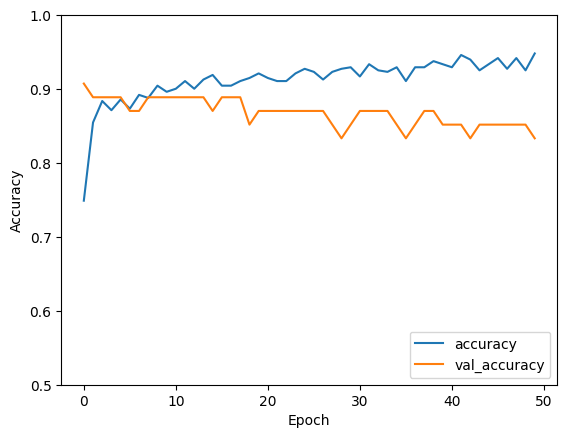

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer with the correct number of features
    layers.Dense(128, activation='relu'),    # Hidden layer with ReLU activation
    layers.Dropout(0.3),                    # Dropout for regularization
    layers.Dense(64, activation='relu'),     # Another hidden layer
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')   # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1) # Adjust epochs and batch size

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels


#Further analysis (confusion matrix, classification report etc.)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

### **ANN - Tunning**

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


### **Tunning ANN using Keras**

In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # Tune the number of units
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                               activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model

tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=20, directory='my_dir', project_name='ann_tuning')
tuner.search(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])
best_model = tuner.get_best_models(num_models=1)[0]


Trial 30 Complete [00h 00m 06s]
val_accuracy: 0.7234042286872864

Best val_accuracy So Far: 0.914893627166748
Total elapsed time: 00h 01m 59s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# classification report for best model with confussion matrix
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85        94
         1.0       0.84      0.92      0.88       107

    accuracy                           0.87       201
   macro avg       0.87      0.86      0.86       201
weighted avg       0.87      0.87      0.87       201

[[76 18]
 [ 9 98]]


### **Cross validation for tuned model**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []

for train_idx, val_idx in kfold.split(X_scaled):
    # Use iloc to select rows based on integer positions
    best_model.fit(X_scaled[train_idx], y.iloc[train_idx])
    preds = (best_model.predict(X_scaled[val_idx]) > 0.5).astype(int)
    acc_scores.append(accuracy_score(y.iloc[val_idx], preds))

print(f"Average CV Accuracy: {np.mean(acc_scores):.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8654 - loss: 0.3422
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9011 - loss: 0.2657 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8802 - loss: 0.3051
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8716 - loss: 0.3239
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8885 - loss: 0.2666 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Average CV Accuracy: 0.8925


# **Ensemble model (RF + XGB + ANN)**

In [ ]:
!pip install scikeras

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from scikeras.wrappers import KerasClassifier
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the Keras model function (ANN model)
def create_keras_model():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_keras_model, epochs=50, batch_size=32, verbose=0)

# Create the individual models (RandomForest, XGBoost, ANN)
rf_classifier = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
xgb_classifier = make_pipeline(StandardScaler(), XGBClassifier(use_label_encoder=False, eval_metric='logloss'))

# Train each model
rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
keras_classifier.fit(X_train, y_train)

# Make predictions for each model
rf_predictions = rf_classifier.predict_proba(X_test)[:, 1]  # Probability for class 1
xgb_predictions = xgb_classifier.predict_proba(X_test)[:, 1]  # Probability for class 1
ann_predictions = keras_classifier.predict_proba(X_test)[:, 1]  # Probability for class 1

# Soft voting: Average the probabilities
avg_predictions = (rf_predictions + xgb_predictions + ann_predictions) / 3

# Final prediction: If avg_probability > 0.5, predict class 1, else predict class 0
final_predictions = (avg_predictions > 0.5).astype(int)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Voting Accuracy: {ensemble_accuracy}")


# Confussion matrix for the ensembe
print(confusion_matrix(y_test, final_predictions))
# Classification report
print(classification_report(y_test, final_predictions))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Ensemble Voting Accuracy: 0.8731343283582089
[[54  9]
 [ 8 63]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86        63
         1.0       0.88      0.89      0.88        71

    accuracy                           0.87       134
   macro avg       0.87      0.87      0.87       134
weighted avg       0.87      0.87      0.87       134



In [ ]:
# Training
rf_train_predictions = rf_classifier.predict_proba(X_train)[:, 1]
xgb_train_predictions = xgb_classifier.predict_proba(X_train)[:, 1]
ann_train_predictions = keras_classifier.predict_proba(X_train)[:, 1]
avg_train_predictions = (rf_train_predictions + xgb_train_predictions + ann_train_predictions) / 3
final_train_predictions = (avg_train_predictions > 0.5).astype(int)
print(classification_report(y_train, final_train_predictions))
print(confusion_matrix(y_train, final_train_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       267
         1.0       1.00      1.00      1.00       269

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

[[266   1]
 [  0 269]]
